In [1]:
%pip install scikit-learn --upgrade
import nltk
import re
import seaborn as sns
from nltk.corpus import stopwords
nltk.download('stopwords')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC
from joblib import dump, load
from sklearn import tree
import numpy as np
import pandas as pd
import itertools
import joblib 

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.7/dist-packages (0.24.2)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
external = pd.read_csv('/content/drive/MyDrive/Senior Year Project/external_tweets.csv')
collected = pd.read_csv('/content/drive/MyDrive/Senior Year Project/collected_tweets.csv')

In [3]:
external.head()

,id,tweet,label
0,1,The CDC currently reports 99031 deaths. In gen...,real
1,2,States reported 1121 deaths a small rise from ...,real
2,3,Politically Correct Woman (Almost) Uses Pandem...,fake
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,5,Populous states can generate large case counts...,real


In [4]:
collected.head()

,Text,Label,Unnamed: 2,Unnamed: 3
0,Hello everyone!!\nStay in home\nStay safe\nBe ...,F,NaN,NaN
1,How many people died from #corona so far?Check...,F,NaN,NaN
2,Do Darr GYA woh Mar gya...\n\nPakistani people...,F,NaN,NaN
3,🇵🇰 Pakistan\n\n#Covid19: Slow spreading and im...,F,NaN,NaN
4,"🇵🇰 Pakistan: ✨🔹✨✨✨⚪🔹✨✨🔹\n\nOfficial cases: 8,4...",F,NaN,NaN


Clean data

In [5]:
external.drop(columns=['id'], inplace=True)
collected.drop(columns=['Unnamed: 2', 'Unnamed: 3'], inplace=True)

In [6]:
external.isnull().values.any()

False

In [7]:
collected.isnull().values.any()

True

In [8]:
collected.isnull().sum()

Text     714
Label    714
dtype: int64

In [9]:
collected.dropna(axis=0, how='any', inplace=True)

In [10]:
collected.isnull().values.any()

False

In [11]:
external.head()

,tweet,label
0,The CDC currently reports 99031 deaths. In gen...,real
1,States reported 1121 deaths a small rise from ...,real
2,Politically Correct Woman (Almost) Uses Pandem...,fake
3,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,Populous states can generate large case counts...,real


In [12]:
collected.head()

,Text,Label
0,Hello everyone!!\nStay in home\nStay safe\nBe ...,F
1,How many people died from #corona so far?Check...,F
2,Do Darr GYA woh Mar gya...\n\nPakistani people...,F
3,🇵🇰 Pakistan\n\n#Covid19: Slow spreading and im...,F
4,"🇵🇰 Pakistan: ✨🔹✨✨✨⚪🔹✨✨🔹\n\nOfficial cases: 8,4...",F


Merging Datasets


In [13]:
collected.rename(columns = {'Text': 'tweet', 'Label': 'label'}, inplace = True)

In [14]:
collected.head()

,tweet,label
0,Hello everyone!!\nStay in home\nStay safe\nBe ...,F
1,How many people died from #corona so far?Check...,F
2,Do Darr GYA woh Mar gya...\n\nPakistani people...,F
3,🇵🇰 Pakistan\n\n#Covid19: Slow spreading and im...,F
4,"🇵🇰 Pakistan: ✨🔹✨✨✨⚪🔹✨✨🔹\n\nOfficial cases: 8,4...",F


In [15]:
new_label = ["fake" if x =="F" else "real" for x in collected['label']]
collected['label'] = new_label

In [16]:
finalDf = pd.concat([external, collected], axis=0)

In [17]:
finalDf.head()

,tweet,label
0,The CDC currently reports 99031 deaths. In gen...,real
1,States reported 1121 deaths a small rise from ...,real
2,Politically Correct Woman (Almost) Uses Pandem...,fake
3,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,Populous states can generate large case counts...,real


In [18]:
finalDf = finalDf.sample(frac=1).reset_index(drop=True)

In [19]:
finalDf.head()

,tweet,label
0,Weighing risk vs reward on human challenge tri...,real
1,God Has Coronavirus https://t.co/7Nh5G7mEqw #r...,fake
2,That brings New Zealand’s total number of acti...,real
3,"@drdavidsamadi Dr. Samadi, do you believe Covi...",fake
4,Mumbai now has a state-of-the-art #COVID19 tes...,real


In [20]:
stopwords = set(stopwords.words("english"))
def cleantext(text):
    # convert to lower case
    text = text.str.lower()
    # removing urls and punctuation
    text = text.apply(lambda x: ' '.join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x).split()))
    # removing &
    text = text.apply(lambda x: ' '.join(re.sub("&", "and", x).split()))
    # removing stop words
    text = text.apply(lambda x: ' '.join([word for word in x.split() if not word in stopwords]))
    
    return text

In [21]:
finalDf['tweet'] = cleantext(finalDf['tweet'])

In [22]:
display(finalDf)

,tweet,label
0,weighing risk vs reward human challenge trials...,real
1,god coronavirus religion god coronavirus,fake
2,brings new zealand total number active cases 1...,real
3,drdavidsamadi dr samadi believe covid 19 bio e...,fake
4,mumbai state art covid19 testing facility icmr...,real
...,...,...
10800,goggles face shields universally recommended f...,real
10801,consistency new guidelines managing rheumatic ...,real
10802,trumps nude statue made new york city anger am...,fake
10803,new doctors featured viral video coronavirus p...,fake


EDA

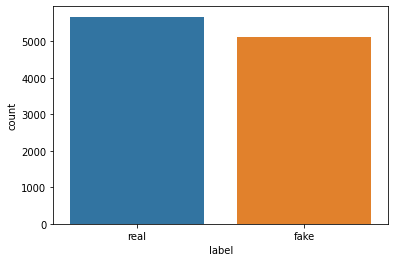

In [23]:
sns.countplot(x = 'label', data= finalDf)

In [24]:
finalDf["num_tokens"] = finalDf["tweet"].map(lambda text: re.sub(r"[^a-zA-Z0-9' ]", ' ', str(text))).map(lambda text: len(text.split()))

In [25]:
finalDf.head()

,tweet,label,num_tokens
0,weighing risk vs reward human challenge trials...,real,9
1,god coronavirus religion god coronavirus,fake,5
2,brings new zealand total number active cases 1...,real,24
3,drdavidsamadi dr samadi believe covid 19 bio e...,fake,8
4,mumbai state art covid19 testing facility icmr...,real,26


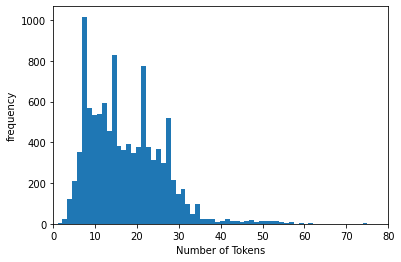

In [26]:
plt.hist(x=finalDf["num_tokens"], bins='auto')
plt.xlabel("Number of Tokens")
plt.ylabel("frequency")
plt.xlim([0, 80])
plt.show()

In [27]:
finalDf.drop(columns=['num_tokens'], inplace=True)

####Splitting Dataframe into Train, Test and Validation

In [28]:
df_train, df_test = train_test_split(finalDf, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(finalDf, test_size=0.25, random_state=1)

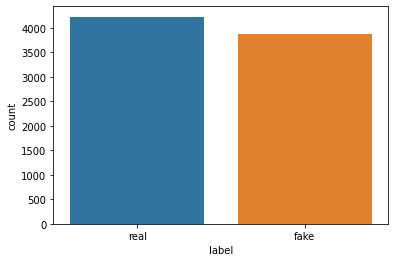

In [29]:
sns.countplot(x="label", data=df_train)

Since the training data is unequal, hence our results will be biased. So we need to resample till its balanced.

In [30]:
  dfs = []

  for label in df_train["label"].value_counts().keys():
    df_group = df_train[df_train["label"] == label]
    df_group_undersampled = resample(df_group, replace=False, n_samples=3500, random_state=0)
    dfs.append(df_group_undersampled)

  df_train_new = pd.concat(dfs).sample(frac=1, random_state=0)

In [31]:
df_train = df_train_new

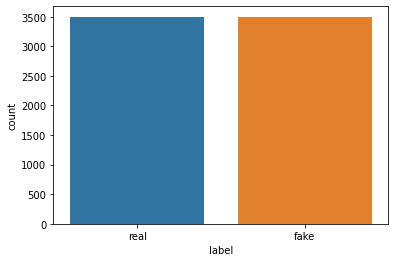

In [32]:
sns.countplot(x="label", data=df_train)

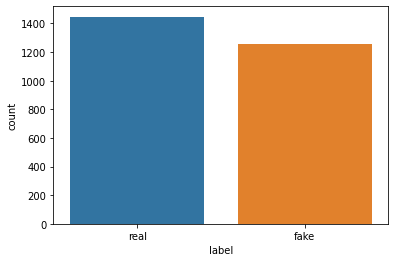

In [33]:
sns.countplot(x="label", data=df_val)

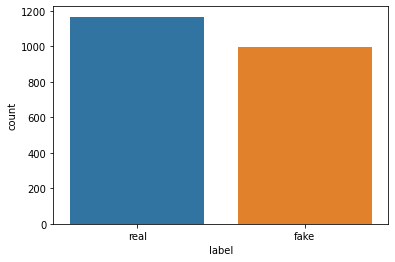

In [34]:
sns.countplot(x="label", data=df_test)

####Vectorization


In [35]:
vector_count = CountVectorizer(min_df=3, ngram_range=(1, 2))
X_train = vector_count.fit_transform(df_train['tweet'].values.astype('U')) 
print(X_train.shape)

(7000, 10036)


In [36]:
X_val = vector_count.transform(df_val['tweet'])
print(X_val.shape) 

(2702, 10036)


In [37]:
X_test = vector_count.transform(df_test['tweet'])
print(X_test.shape)

(2161, 10036)


In [38]:
y_train = pd.get_dummies(df_train['label'])['fake']
y_val = pd.get_dummies(df_val['label'])['fake']
y_test = pd.get_dummies(df_test['label'])['fake']

####Machine Learning

In [39]:
def print_metrices(classifier, X_test, pred, true):
    print(classification_report(true,pred))
    print("Accuracy : ",accuracy_score(true, pred))
    print("Precison : ",precision_score(true, pred , average = 'weighted'))
    print("Recall : ",recall_score(true, pred,  average = 'weighted'))
    print("F1 : ",f1_score(true, pred,  average = 'weighted'))
    print("Mean Squared Error (MSE):", mean_squared_error(true, pred))
    print("Root Mean Squared Error (RMSE):", mean_squared_error(true, pred, squared=False))
    disp = plot_confusion_matrix(classifier, X_test, true, cmap=plt.cm.YlGnBu, normalize='true')
    plt.show()
    print()

In [40]:
def evaluate(classifier, X_train, y_train, X_val, y_val, X_test, y_test):
    print("Training Scores:")
    print_metrices(classifier, X_train, classifier.predict(X_train), y_train)
    print("Validation Scores:")
    print_metrices(classifier, X_val, classifier.predict(X_val), y_val)

Naive Bayes

Training Scores:
              precision    recall  f1-score   support

           0       0.97      0.90      0.93      3500
           1       0.91      0.97      0.94      3500

    accuracy                           0.94      7000
   macro avg       0.94      0.94      0.94      7000
weighted avg       0.94      0.94      0.94      7000

Accuracy :  0.9372857142857143
Precison :  0.9396934757589706
Recall :  0.9372857142857143
F1 :  0.9371997407307747
Mean Squared Error (MSE): 0.06271428571428571
Root Mean Squared Error (RMSE): 0.250428204710024


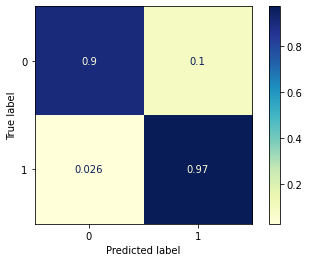


Validation Scores:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      1447
           1       0.88      0.95      0.91      1255

    accuracy                           0.91      2702
   macro avg       0.91      0.92      0.91      2702
weighted avg       0.92      0.91      0.91      2702

Accuracy :  0.9148778682457439
Precison :  0.9172136999255384
Recall :  0.9148778682457439
F1 :  0.9149852807632302
Mean Squared Error (MSE): 0.0851221317542561
Root Mean Squared Error (RMSE): 0.2917569737885559


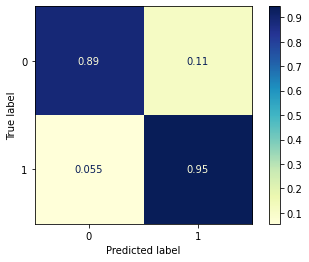

In [41]:
clf_nb = MultinomialNB()
clf_nb.fit(X_train, y_train)
evaluate(clf_nb, X_train, y_train, X_val, y_val, X_test, y_test)

Logistic Regression

Training Scores:
              precision    recall  f1-score   support

           0       0.97      0.90      0.93      3500
           1       0.90      0.97      0.93      3500

    accuracy                           0.93      7000
   macro avg       0.93      0.93      0.93      7000
weighted avg       0.93      0.93      0.93      7000

Accuracy :  0.9321428571428572
Precison :  0.9344854965355656
Recall :  0.9321428571428572
F1 :  0.9320512664101045
Mean Squared Error (MSE): 0.06785714285714285
Root Mean Squared Error (RMSE): 0.26049403612586386


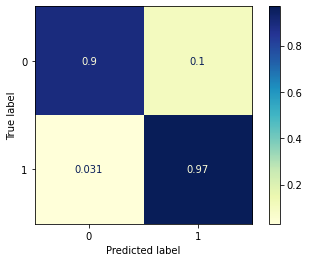


Validation Scores:
              precision    recall  f1-score   support

           0       0.96      0.87      0.91      1447
           1       0.87      0.96      0.91      1255

    accuracy                           0.91      2702
   macro avg       0.91      0.92      0.91      2702
weighted avg       0.92      0.91      0.91      2702

Accuracy :  0.9122871946706144
Precison :  0.9167709909418179
Recall :  0.9122871946706144
F1 :  0.9123832485358901
Mean Squared Error (MSE): 0.08771280532938563
Root Mean Squared Error (RMSE): 0.2961634773725242


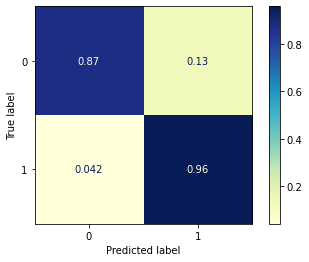

In [42]:
clf_lr = LogisticRegression(solver='lbfgs', C=0.05)
clf_lr.fit(X_train, y_train)
evaluate(clf_lr, X_train, y_train, X_val, y_val, X_test, y_test)

Decision Trees


Training Scores:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3500
           1       1.00      1.00      1.00      3500

    accuracy                           1.00      7000
   macro avg       1.00      1.00      1.00      7000
weighted avg       1.00      1.00      1.00      7000

Accuracy :  0.9997142857142857
Precison :  0.9997142857142857
Recall :  0.9997142857142857
F1 :  0.9997142857142857
Mean Squared Error (MSE): 0.00028571428571428574
Root Mean Squared Error (RMSE): 0.016903085094570332


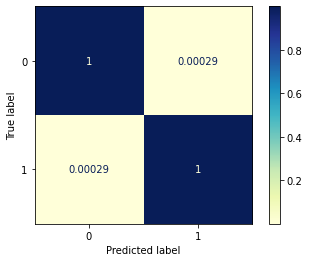


Validation Scores:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      1447
           1       0.85      0.87      0.86      1255

    accuracy                           0.87      2702
   macro avg       0.87      0.87      0.87      2702
weighted avg       0.87      0.87      0.87      2702

Accuracy :  0.8700962250185048
Precison :  0.8703945939534293
Recall :  0.8700962250185048
F1 :  0.8701707959794672
Mean Squared Error (MSE): 0.1299037749814952
Root Mean Squared Error (RMSE): 0.3604216627528029


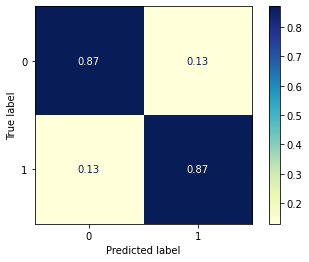

In [43]:
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)
evaluate(clf_dt, X_train, y_train, X_val, y_val, X_test, y_test)

Gradient Boosting

Training Scores:
              precision    recall  f1-score   support

           0       0.92      0.83      0.87      3500
           1       0.85      0.93      0.89      3500

    accuracy                           0.88      7000
   macro avg       0.88      0.88      0.88      7000
weighted avg       0.88      0.88      0.88      7000

Accuracy :  0.8808571428571429
Precison :  0.8849295402791987
Recall :  0.8808571428571429
F1 :  0.8805411864850708
Mean Squared Error (MSE): 0.11914285714285715
Root Mean Squared Error (RMSE): 0.34517076519145873


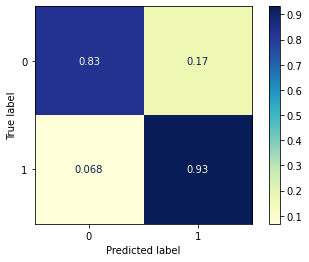


Validation Scores:
              precision    recall  f1-score   support

           0       0.94      0.82      0.88      1447
           1       0.82      0.94      0.88      1255

    accuracy                           0.88      2702
   macro avg       0.88      0.88      0.88      2702
weighted avg       0.89      0.88      0.88      2702

Accuracy :  0.8778682457438934
Precison :  0.8864328366441648
Recall :  0.8778682457438934
F1 :  0.8778808256296813
Mean Squared Error (MSE): 0.12213175425610659
Root Mean Squared Error (RMSE): 0.3494735387065902


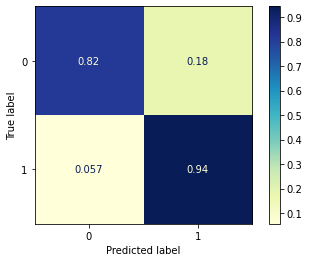

In [44]:
clf_xgb = GradientBoostingClassifier()
clf_xgb.fit(X_train, y_train)
evaluate(clf_xgb, X_train, y_train, X_val, y_val, X_test, y_test)

Linear SVM

Training Scores:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3500
           1       0.99      1.00      1.00      3500

    accuracy                           1.00      7000
   macro avg       1.00      1.00      1.00      7000
weighted avg       1.00      1.00      1.00      7000

Accuracy :  0.9954285714285714
Precison :  0.9954649729367873
Recall :  0.9954285714285714
F1 :  0.9954284874620146
Mean Squared Error (MSE): 0.004571428571428572
Root Mean Squared Error (RMSE): 0.06761234037828133


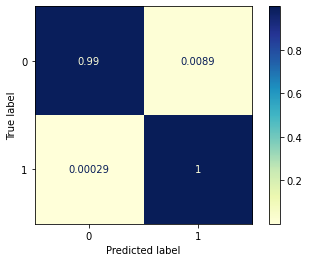


Validation Scores:
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      1447
           1       0.91      0.94      0.92      1255

    accuracy                           0.93      2702
   macro avg       0.93      0.93      0.93      2702
weighted avg       0.93      0.93      0.93      2702

Accuracy :  0.927461139896373
Precison :  0.92808334608487
Recall :  0.927461139896373
F1 :  0.9275260361110477
Mean Squared Error (MSE): 0.07253886010362694
Root Mean Squared Error (RMSE): 0.2693303920905083


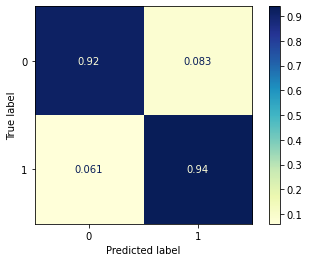

In [45]:
clf_sgd = LinearSVC(loss='hinge', C=0.42, tol=1e-04)
clf_sgd.fit(X_train, y_train)
evaluate(clf_sgd, X_train, y_train, X_val, y_val, X_test, y_test)

Predicting on Test Data with Linear SVM, as it has the higest F1 score for validation data.

Testing Scores with Linear SVM:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1167
           1       0.90      0.94      0.92       994

    accuracy                           0.93      2161
   macro avg       0.93      0.93      0.93      2161
weighted avg       0.93      0.93      0.93      2161

Accuracy :  0.9264229523368811
Precison :  0.9273341884405935
Recall :  0.9264229523368811
F1 :  0.9265113455971816
Mean Squared Error (MSE): 0.07357704766311893
Root Mean Squared Error (RMSE): 0.27125089430842236


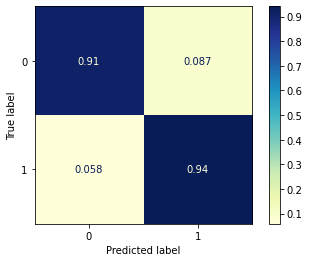

In [46]:
print("Testing Scores with Linear SVM:")
print_metrices(clf_sgd, X_test, clf_sgd.predict(X_test), y_test)

Exporting Model and Vectorizer to deploy the machine learning model.

In [47]:
joblib.dump(vector_count, 'vectorizer.joblib')

['vectorizer.joblib']

In [48]:
joblib.dump(clf_sgd, 'model.joblib')

['model.joblib']

Testing the files created for deployment.

In [49]:
model = joblib.load('model.joblib')
vectorizer = joblib.load('vectorizer.joblib')

In [50]:
text = "Eating icecream can cure Covid-19"
pred = model.predict(vectorizer.transform([text]))[0]
print ("predicted class:", "real" if pred == 0 else "fake")

predicted class: fake


In [51]:
text = "Protect yourself and others from #COVID19 when using public transportation. Practice social distancing avoid touching surfaces and practice hand hygiene."
pred = model.predict(vectorizer.transform([text]))[0]
print ("predicted class:", "real" if pred == 0 else "fake")

predicted class: real
